<a href="https://colab.research.google.com/github/jvnithin/ml/blob/main/p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Required Libraries  

In [ ]:
pip install numpy pandas matplotlib seaborn scikit-learn tensorflow


Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D


Data Collection and Preprocessing
Load the MNIST Dataset

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


Data Exploration

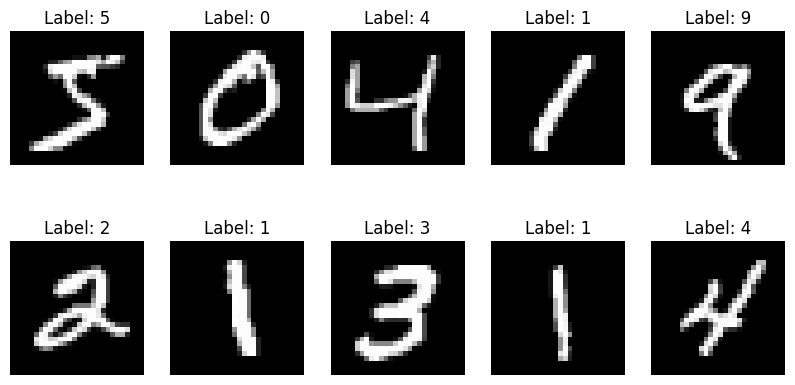

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [ ]:
# Visualize a few sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# Check the shape of the data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Data Normalization

In [ ]:
# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data for neural network input
X_train_reshaped = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], 28, 28, 1)


Train-Test Split for Classical ML Model

In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)


Model Training

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_split, y_train_split)
y_pred_lr = lr.predict(X_val_split)
print("Logistic Regression Accuracy:", accuracy_score(y_val_split, y_pred_lr))


Logistic Regression Accuracy: 0.9224166666666667


 Model Evaluation

In [ ]:
models = {
    "Logistic Regression": lr
    # "Decision Tree": dt,
    # "Random Forest": rf,
    # "SVM": svm
}

for name, model in models.items():
    y_pred = model.predict(X_test_flat)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9248
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Confusion Matrix for the Best Model

In [ ]:
import seaborn as sns

best_model = cnn
y_pred_cnn = best_model.predict_classes(X_test_reshaped)
cm = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for CNN')
plt.show()


NameError: name 'cnn' is not defined